In [1]:
import pandas as pd
from src.features.preprocess_data import fetch_preprocessed_uniform_data


X_train, y_train, X_val, y_val = fetch_preprocessed_uniform_data()



# Display the first few rows of each dataset
X_train.head(), y_train.head(), X_val.head(), y_val.head()


c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\src\features\feature_engineering.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sin_day_of_year"] = df["date_forecast"].apply(get_sin_day)
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\src\features\feature_engineering.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cos_day_of_year"] = df["date_forecast"].apply(get_cos_day)
c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\src\features\feature_en

(       absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_energy_1h:J  \
 890                       8.950              1.24900                0.00000   
 61344                     4.200              1.25200                0.00000   
 3437                      7.575              1.23975                0.00000   
 58310                     8.525              1.23250           406653.21875   
 49978                     3.900              1.26975           228987.65625   
 
        clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
 890           0.000000        523.099976              1.0      282.424988   
 61344         0.000000        725.250000              0.0      271.299988   
 3437          0.000000       1040.349976              1.0      279.774994   
 58310        66.824997       2028.300049              0.0      281.750000   
 49978        97.699997       3737.000000              0.0      270.299988   
 
        diffuse_rad:W  diffuse_rad_1h:J  direct_

In [2]:
from src.data.data_fetcher import get_all_features, get_raw_data
from src.features.feature_engineering import prepare_data
from src.features.preprocess_data import get_preprocessed_test_data, fetch_preprocessed_data
pd.set_option('display.max_columns', 200)


from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()



X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()

x_whole = pd.concat([X_train_obs_combined, X_val_obs_combined])
y_whole = pd.concat([y_train_obs_combined, y_val_obs_combined])
x_whole.reset_index(drop=True, inplace=True)
y_whole.reset_index(drop=True, inplace=True)

# AutoML use of TPOT
We will use TPOT as the AutoML tool, which is a Python library for optimizing machine learning pipelines using genetic programming. TPOT will automatically explore hundreds of possible pipelines to find the best one for the dataset.

#### Steps:
1. Split the merged training datasets into feature matrices X and target vectors y.
2- Divide the datasets into training and validation subsets.
3. Configure TPOT and run it on the datasets to find the best model and preprocessing pipeline.
4. Evaluate the model on the validation set using Mean Absolute Error (MAE).
5. Finally, make predictions on the test dataset.
6. 
Let's start by preparing the feature matrices and target vectors and splitting them into training and validation subsets.

In [4]:
(X_train_obs_combined.shape, X_val_obs_combined.shape, 
 y_train_obs_combined.shape, y_val_obs_combined.shape)


((65620, 43), (16406, 43), (65620,), (16406,))

In [5]:
%pip install tpot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
from tpot import TPOTRegressor
from sklearn.metrics import mean_absolute_error
# Initialize the TPOT Regressor with configurations


tpot = TPOTRegressor(
    generations=10,  # Number of iterations to optimize the pipeline
    population_size=100,  # Number of individuals in the population
    offspring_size=None,  # Number of offspring to produce in each generation
    mutation_rate=0.9,  # Probability of mutating a pipeline
    crossover_rate=0.1,  # Probability of crossing over two pipelines
    scoring='neg_mean_absolute_error',  # Scoring method to evaluate the pipeline performance
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    max_time_mins=None,  # No maximum time limit
    max_eval_time_mins=5,  # Evaluate each pipeline for maximum 5 minutes
    random_state=42,  # Ensure reproducibility
    config_dict='TPOT light',  # Use a basic configuration of TPOT
    verbosity=2,  # Print generation details: 2 (every generation), 1 (only the final generation), 0 (no output)
    warm_start=False,  # Do not reuse previous session
    subsample=0.8
)

# Run TPOT on the training subset of the observed dataset to find the best model and preprocessing pipeline
tpot.fit(x_whole, y_whole)




Optimization Progress:   0%|          | 0/240 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -86.93579126521436

Generation 2 - Current best internal CV score: -86.93579126521436

Generation 3 - Current best internal CV score: -85.90161873587509

Generation 4 - Current best internal CV score: -85.57815002509363

Generation 5 - Current best internal CV score: -85.57815002509363

Best pipeline: XGBRegressor(StandardScaler(input_matrix), learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.7000000000000001, verbosity=0)


TPOTRegressor(early_stop=5, generations=5, n_jobs=-1, population_size=40,
              random_state=42, scoring='neg_mean_absolute_error', verbosity=2)

In [7]:
# Evaluate the best model on the validation subset of the observed dataset
y_pred = tpot.predict(X_val)
mae_observed = mean_absolute_error(y_val, y_pred)

print(f'Mean Absolute Error on Validation Set: {mae_observed}')

Mean Absolute Error on Validation Set: 50.32853745955554


Model Analysis


In [8]:
# Extract the trained RandomForestRegressor from TPOT
rf_model = tpot.fitted_pipeline_.steps[-1][1]

# 2. Model Parameters
model_parameters = rf_model.get_params()
print("Model Parameters:")
print(model_parameters)

# Optionally: Additional Performance Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on other performance metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")
print(f"R-squared on Validation Set: {r2}")

# Create a python file of the optimized pipeline
tpot.export('optimized_pipeline_tpot.py')

Model Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': 1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.7000000000000001, 'tree_method': None, 'validate_parameters': None, 'verbosity': 0}
Mean Squared Error on Validation Set: 19375.264469425158
R-squared on Validation Se

# Feature importance

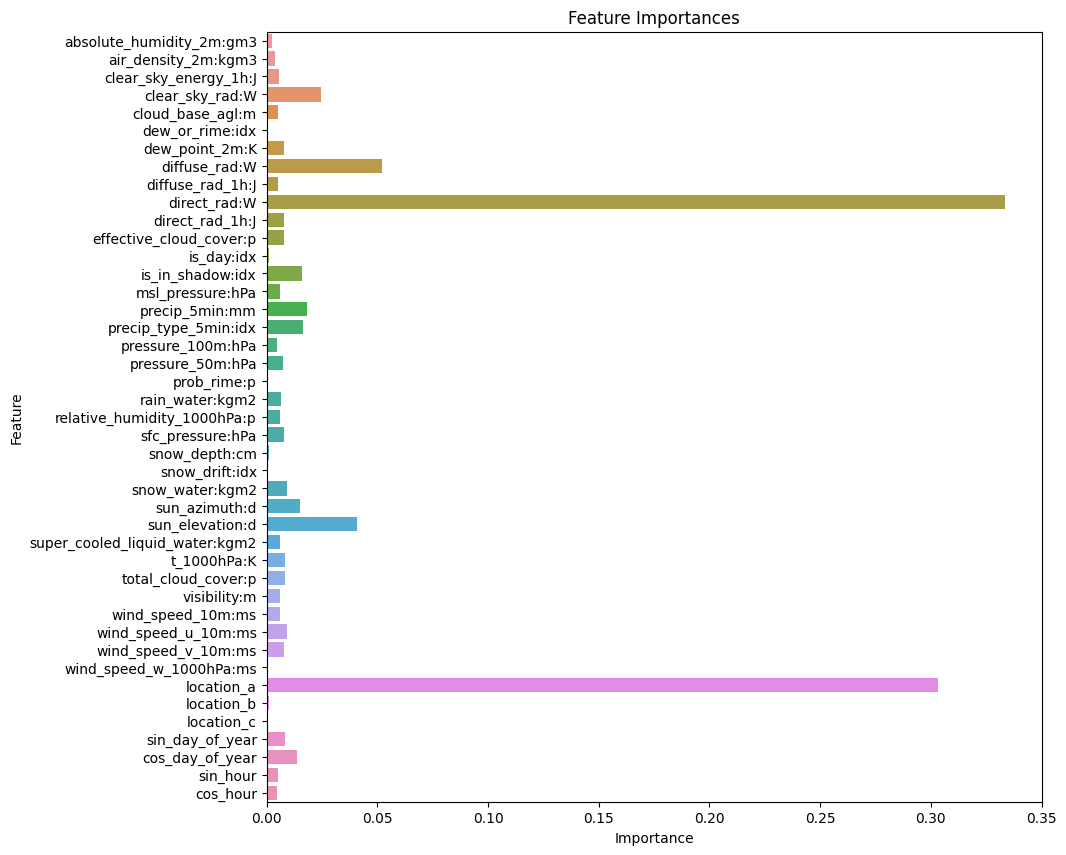

In [9]:
# 3. Feature Importances
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract the feature importances into a dataframe
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
plt.figure(figsize=(10, 10))
sns.barplot(x=importances, y=X_train.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig(f'results/figures/feature_importance/tpot.png')
plt.show()



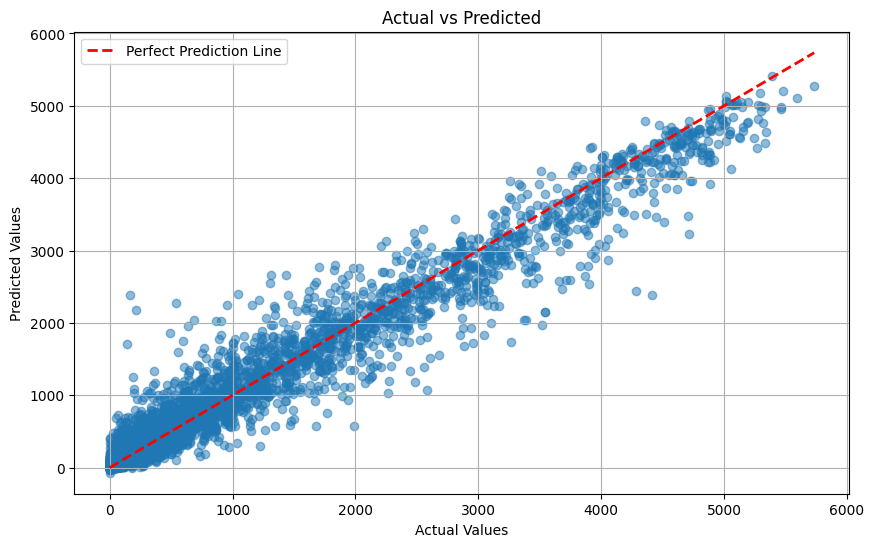

In [10]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(actual, predicted):
    plt.figure(figsize=(10,6))
    
    # Scatter plot of actual vs predicted values
    plt.scatter(actual, predicted, alpha=0.5)
    
    # Line for perfect predictions
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2, color='red', label='Perfect Prediction Line')
    
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage:
plot_actual_vs_predicted(y_val, y_pred)


In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from tpot.export_utils import set_param_recursive


X_train, y_train, X_val, y_val = fetch_preprocessed_uniform_data()

# Average CV score on the training set was: -86.3409718614859
exported_pipeline = XGBRegressor(learning_rate=0.1, max_depth=9, min_child_weight=6, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=1.0, verbosity=0)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_val)


print(f"MAE: {mean_absolute_error(y_val, results)}")

MAE: 79.30329311388826


In [12]:
# Make predictions using the trained Linear Regression model on the processed test estimated data
from src.features.preprocess_data import get_final_prediction
from src.features.preprocess_data import get_preprocessed_test_data, fetch_preprocessed_data
from src.models.saving import save_predictions

X_test_a, X_test_b, X_test_c = get_preprocessed_test_data()

y_pred_a = tpot.predict(X_test_a)
y_pred_b = tpot.predict(X_test_b)
y_pred_c = tpot.predict(X_test_c)
# Combine the predictions from the three locations into a single dataframe

y_pred_test_est_combined = get_final_prediction(y_pred_a, y_pred_b, y_pred_c)
y_pred_test_est_combined.head(20)

save_predictions(y_pred_test_est_combined, 'tpot_predictions_with_all_data')

   id  prediction
0   0    0.283374
1   1    0.281547
2   2    0.281547
3   3    4.172099
4   4  204.694107
